In [1]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [3]:
transition_exp_hard = np.load('exp_to_hard_matrix.npy')
transition_exp_med = np.load('exp_to_med_matrix.npy')
transition_exp_easy = np.load('exp_to_easy_matrix.npy')


In [4]:
charts_path = Path(r'C:\Users\cheny\OneDrive\Desktop\jackie_charts\blink-182 - Generational Divide')
expert = np.load(charts_path / 'Expert_simplified.npy')
medium = np.load(charts_path / 'Medium_simplified.npy')
easy = np.load(charts_path / 'Easy_simplified.npy')

In [41]:
ref = {k: v for v, k in enumerate([  1.,   2.,   3.,   4.,   5.,   6.,   7.,  10.,  11.,  13.,  14.,
        15.,  16.,  17.,  19.,  22.,  23.,  24.,  26., 218.])}
ref[0.0] = 20
ref

{1.0: 0,
 2.0: 1,
 3.0: 2,
 4.0: 3,
 5.0: 4,
 6.0: 5,
 7.0: 6,
 10.0: 7,
 11.0: 8,
 13.0: 9,
 14.0: 10,
 15.0: 11,
 16.0: 12,
 17.0: 13,
 19.0: 14,
 22.0: 15,
 23.0: 16,
 24.0: 17,
 26.0: 18,
 218.0: 19,
 0.0: 20}

In [22]:
df = pd.DataFrame(transition_exp_hard, columns =[  1.,   2.,   3.,   4.,   5.,   6.,   7.,  10.,  11.,  13.,  14.,
        15.,  16.,  17.,  19.,  22.,  23.,  24.,  26., 218., 0.])

In [23]:
df

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,10.0,11.0,13.0,...,15.0,16.0,17.0,19.0,22.0,23.0,24.0,26.0,218.0,0.0
0,0.167598,0.335196,0.016760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.480447
1,0.003861,0.389961,0.104247,0.019305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482625
2,0.000000,0.040590,0.557196,0.066421,0.011070,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324723
3,0.000000,0.000000,0.025974,0.523810,0.064935,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385281
4,0.000000,0.000000,0.013605,0.034014,0.564626,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.387755
5,0.507042,0.028169,0.000000,0.000000,0.000000,0.464789,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.818182,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.000000,0.088235,0.294118,0.058824,0.000000,0.000000,0.000000,0.264706,0.000000,0.117647,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471
8,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,0.000000,0.000000,0.516129,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.096774,...,0.096774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258065


In [42]:
ref

{1.0: 0,
 2.0: 1,
 3.0: 2,
 4.0: 3,
 5.0: 4,
 6.0: 5,
 7.0: 6,
 10.0: 7,
 11.0: 8,
 13.0: 9,
 14.0: 10,
 15.0: 11,
 16.0: 12,
 17.0: 13,
 19.0: 14,
 22.0: 15,
 23.0: 16,
 24.0: 17,
 26.0: 18,
 218.0: 19,
 0.0: 20}

Single Song 

In [182]:

'''
transition_matrix: the distribution for the notes to convert (to hard, to medium, to easy)
expert: the expert note chart to convert

output: a numpy array for the transition notes
'''
def difficulty_convertion(transition_matrix, expert):
    #converting to note from index key
    rev_note_index_key = {v:k for k, v in ref.items()

    #innitiate output note list
    output_note_array = []

    for i in expert:
        #fill in the 0
        if i == 0:
            output_note_array.append(0)

        else:
            cur_note = i
            #current note to replace -> key
            cur_note_key = ref[cur_note]

            #select note from the transition matrix
            #a = number of note keys to choose from,
            #p = prob distribution for the current key 
            note_selection = np.random.choice(21,replace= True,p= transition_matrix[cur_note_key])
            #convert note key to note selection
            note_to_replace = rev_note_index_key[note_selection]
            #print(note_to_replace)
            #append the note to output array 
            output_note_array.append(note_to_replace)
    
    #convert to numpy array
    output_note_array = np.array(output_note_array)

    return output_note_array
        

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
sys.path.insert(1, str(Path.cwd().parent))
from tensor_hero.visualization import slice_notes, plot_chart
from tensor_hero.difficulty_conversion import difficulty_convertion

In [7]:
easy_1 = difficulty_convertion('easy', expert)

<Figure size 720x360 with 0 Axes>

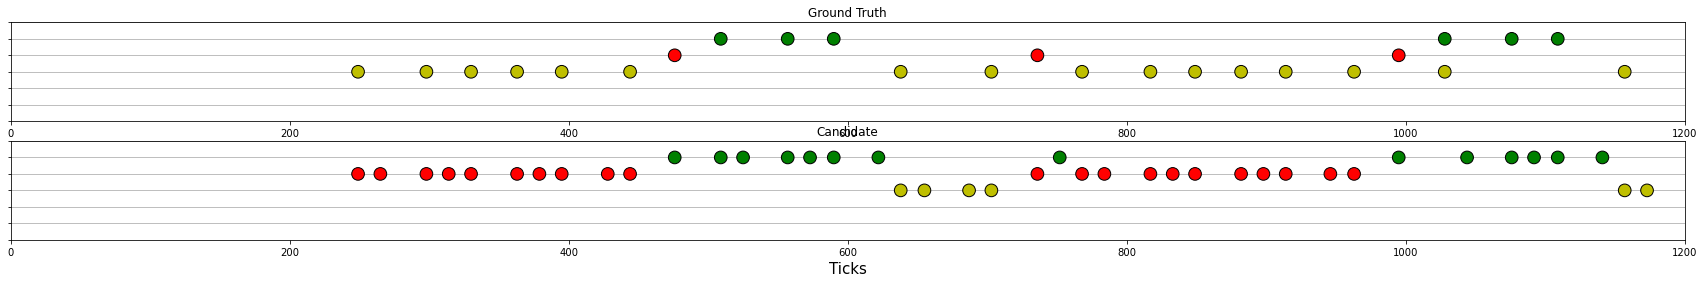

In [8]:
plt.figure(figsize=(10, 5))
_ = plot_chart(slice_notes(easy,0,12), slice_notes(easy_1,0,12))